In [1]:
import keras

Using TensorFlow backend.


In [2]:
print('working')

working


In [3]:
from  __future__  import print_function

import time
from PIL import Image
import numpy as np

from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16

from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave

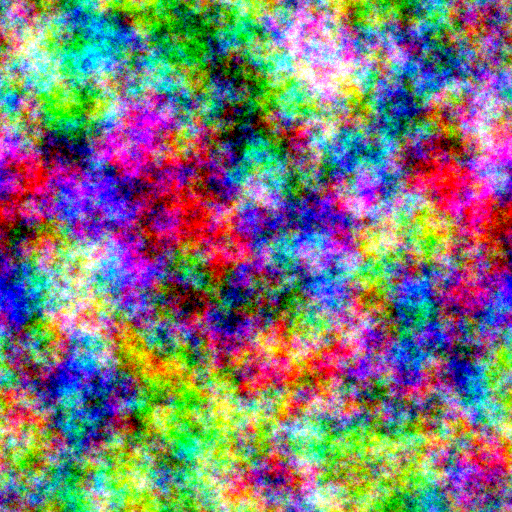

In [4]:
height = 512
width = 512

content_image_path = '/Users/yuristickney/Style-Transfer-Net/Noise_Image.jpg'
content_image = Image.open(content_image_path)
content_image = content_image.resize((width, height))
content_image


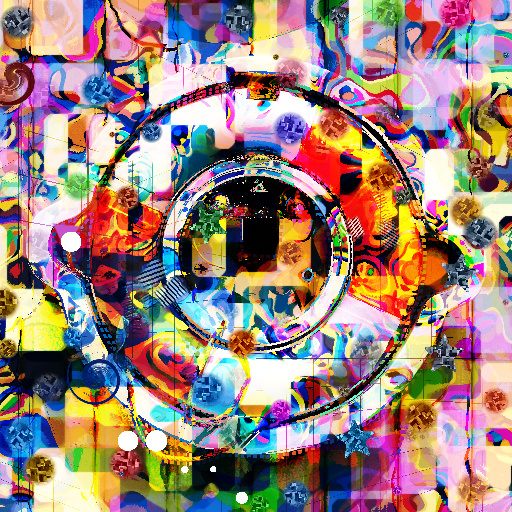

In [5]:
style_image_path = '/Users/yuristickney/Style-Transfer-Net/Trippy_Image.jpg'
style_image = Image.open(style_image_path)
style_image = style_image.resize((width, height))
style_image

In [6]:
content_array  = np.asarray(content_image, dtype='float32')
content_array = np.expand_dims(content_array, axis=0)
print(content_array.shape)

style_array = np.asarray(style_image, dtype='float32')
style_array = np.expand_dims(style_array, axis=0)
print(style_array.shape)

(1, 512, 512, 3)
(1, 512, 512, 3)


In [7]:
content_array[:, :, :, 0] -= 103.939
content_array[:, :, :, 1] -= 116.779
content_array[:, :, :, 2] -= 123.68
content_array = content_array[:, :, :, ::-1]

style_array[:, :, :, 0] -= 103.939
style_array[:, :, :, 1] -= 116.779
style_array[:, :, :, 2] -= 123.68
style_array = style_array[:, :, :, ::-1]

In [8]:
content_imagecontent  = backend.variable(content_array)
style_image = backend.variable(style_array)
combination_image = backend.placeholder((1, height, width, 3))

In [9]:
input_tensor = backend.concatenate([content_image,
                                    style_image,
                                    combination_image], axis=0)

TypeError: Tensors in list passed to 'values' of 'ConcatV2' Op have types [uint8, float32, float32] that don't all match.